In [22]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

from sampler import sample_from_logreg

from sklearn.gaussian_process.kernels import RBF

import numpy as np
import matplotlib.pyplot as plt

from cv_svm import SVM_smooth
from kernel_svm import SVM_smooth_kernel

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
#X, y = load_breast_cancer(return_X_y=True)
#X, y = make_classification(n_samples=250, n_features=50)
X, _, y = sample_from_logreg(n=250, p=20, seed=120)
n = X.shape[0]
p = X.shape[1]
y[np.where(y == 0)] = -1

In [3]:
X_scaled = StandardScaler().fit_transform(X)
#X_scaled = X
print(X_scaled.shape)

(250, 20)


In [4]:
clf = SVC(kernel='linear')
clf.fit(X_scaled, y)
sk_coef_og = clf.coef_.flatten()
sk_coef = clf.coef_/np.linalg.norm(clf.coef_)
print(clf.coef_)
print(clf.intercept_)

[[ 1.44119178e+00 -2.29122060e-01 -4.73133921e-01 -5.71197691e-01
  -9.23568038e-02 -4.16302288e-01  2.29394113e-01 -2.91213658e-02
  -1.85803923e-01  1.53175947e-01  2.37632445e-01  1.26117844e-01
   1.51192806e-01 -1.06962035e-03  1.36621515e-02  4.48711746e-01
   1.74007771e+00  2.70215171e-02 -2.03117321e+00  3.15806682e-02]]
[-0.02560786]


In [5]:
y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

0.88

In [6]:
#sigma = 1e-5
#lbd = 1e-4
sigma = 1e-10
lbd = 1e-10

In [7]:
# calculate maximum bound
from sklearn.metrics import pairwise_distances
m_max = np.min(pairwise_distances(X))**2
print(m_max)

C = np.linalg.norm(X.T @ X)/(n - 1)

max_bound = 1 + C/(lbd * sigma) *\
            1/(2 * np.sqrt(1 + (m_max/sigma)**2)**3)
print(max_bound)

# what lambda do we have to pick?
b = 1e10
lbd_pick = C/((b - 1) * sigma) *\
            1/(2 * np.sqrt(1 + (m_max/sigma)**2)**3)
lbd_pick

0.0
2.312838670604874e+20


2.312838670836158

In [8]:
clf = SVM_smooth(sigma=sigma, lbd=lbd_pick)
clf.fit(X_scaled, y, thresh=1e-7, n_iter=7500, eta=0.5/n,
        approx_cv=True, cv=True, log_iter=True, log_iacv=True,
        save_cond_nums=True, save_err_approx=True, save_err_cv=True,
        warm_start=0, normalise=False, adjust_factor=True,
        save_hessian_norms=True)
#clf = SVM_smooth_kernel(sigma=sigma, lbd=lbd, kernel=RBF(3.5))
#clf.fit(X_scaled, y, n_iter=2500, eta=0.5/n, approx_cv=True, cv=True, log_iacv=True, save_err_approx=True, save_err_cv=True)

#print(f"grad {np.linalg.norm(clf.nabla_fgd_(clf.weights_, X_scaled, y, clf.sigma_, clf.lbd_))}")
#coef = clf.weights_/np.linalg.norm(clf.weights_)
#print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

coef = clf.weights_/np.linalg.norm(clf.weights_)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

iter 0 | grad 0.70880 | objective 1.00063 | IACV: 0.00000567 | baseline: 0.00003536
iter 1 | grad 0.70552 | objective 1.00127 | IACV: 0.00001132 | baseline: 0.00007055
iter 2 | grad 0.70225 | objective 1.00189 | IACV: 0.00001694 | baseline: 0.00010558
iter 3 | grad 0.69901 | objective 1.00252 | IACV: 0.00002253 | baseline: 0.00014045
iter 4 | grad 0.69577 | objective 1.00314 | IACV: 0.00002810 | baseline: 0.00017515
iter 5 | grad 0.69255 | objective 1.00376 | IACV: 0.00003364 | baseline: 0.00020970
iter 6 | grad 0.68935 | objective 1.00438 | IACV: 0.00003916 | baseline: 0.00024408
iter 7 | grad 0.68616 | objective 1.00499 | IACV: 0.00004465 | baseline: 0.00027831
iter 8 | grad 0.68299 | objective 1.00561 | IACV: 0.00005011 | baseline: 0.00031238
iter 9 | grad 0.67983 | objective 1.00622 | IACV: 0.00005555 | baseline: 0.00034629
iter 10 | grad 0.67668 | objective 1.00682 | IACV: 0.00006097 | baseline: 0.00038004
iter 11 | grad 0.67355 | objective 1.00742 | IACV: 0.00006636 | baseline: 0

iter 107 | grad 0.43159 | objective 1.05404 | IACV: 0.00048302 | baseline: 0.00301083
iter 108 | grad 0.42959 | objective 1.05442 | IACV: 0.00048646 | baseline: 0.00303226
iter 109 | grad 0.42760 | objective 1.05480 | IACV: 0.00048988 | baseline: 0.00305359
iter 110 | grad 0.42563 | objective 1.05519 | IACV: 0.00049329 | baseline: 0.00307482
iter 111 | grad 0.42366 | objective 1.05556 | IACV: 0.00049668 | baseline: 0.00309595
iter 112 | grad 0.42170 | objective 1.05594 | IACV: 0.00050005 | baseline: 0.00311699
iter 113 | grad 0.41975 | objective 1.05632 | IACV: 0.00050341 | baseline: 0.00313793
iter 114 | grad 0.41781 | objective 1.05669 | IACV: 0.00050676 | baseline: 0.00315877
iter 115 | grad 0.41587 | objective 1.05706 | IACV: 0.00051008 | baseline: 0.00317951
iter 116 | grad 0.41395 | objective 1.05743 | IACV: 0.00051340 | baseline: 0.00320016
iter 117 | grad 0.41203 | objective 1.05780 | IACV: 0.00051669 | baseline: 0.00322071
iter 118 | grad 0.41013 | objective 1.05817 | IACV: 0.

iter 203 | grad 0.27655 | objective 1.08390 | IACV: 0.00075000 | baseline: 0.00467502
iter 204 | grad 0.27527 | objective 1.08415 | IACV: 0.00075221 | baseline: 0.00468875
iter 205 | grad 0.27399 | objective 1.08440 | IACV: 0.00075440 | baseline: 0.00470241
iter 206 | grad 0.27273 | objective 1.08464 | IACV: 0.00075658 | baseline: 0.00471602
iter 207 | grad 0.27146 | objective 1.08488 | IACV: 0.00075876 | baseline: 0.00472956
iter 208 | grad 0.27021 | objective 1.08513 | IACV: 0.00076092 | baseline: 0.00474304
iter 209 | grad 0.26896 | objective 1.08537 | IACV: 0.00076307 | baseline: 0.00475645
iter 210 | grad 0.26771 | objective 1.08561 | IACV: 0.00076521 | baseline: 0.00476981
iter 211 | grad 0.26648 | objective 1.08584 | IACV: 0.00076734 | baseline: 0.00478310
iter 212 | grad 0.26524 | objective 1.08608 | IACV: 0.00076947 | baseline: 0.00479633
iter 213 | grad 0.26402 | objective 1.08632 | IACV: 0.00077158 | baseline: 0.00480950
iter 214 | grad 0.26280 | objective 1.08655 | IACV: 0.

iter 311 | grad 0.16761 | objective 1.10489 | IACV: 0.00093759 | baseline: 0.00584430
iter 312 | grad 0.16684 | objective 1.10504 | IACV: 0.00093892 | baseline: 0.00585262
iter 313 | grad 0.16606 | objective 1.10519 | IACV: 0.00094025 | baseline: 0.00586090
iter 314 | grad 0.16530 | objective 1.10534 | IACV: 0.00094158 | baseline: 0.00586915
iter 315 | grad 0.16453 | objective 1.10548 | IACV: 0.00094289 | baseline: 0.00587735
iter 316 | grad 0.16377 | objective 1.10563 | IACV: 0.00094420 | baseline: 0.00588552
iter 317 | grad 0.16301 | objective 1.10578 | IACV: 0.00094551 | baseline: 0.00589366
iter 318 | grad 0.16226 | objective 1.10592 | IACV: 0.00094681 | baseline: 0.00590175
iter 319 | grad 0.16151 | objective 1.10607 | IACV: 0.00094810 | baseline: 0.00590981
iter 320 | grad 0.16076 | objective 1.10621 | IACV: 0.00094938 | baseline: 0.00591782
iter 321 | grad 0.16002 | objective 1.10635 | IACV: 0.00095066 | baseline: 0.00592581
iter 322 | grad 0.15928 | objective 1.10650 | IACV: 0.

iter 419 | grad 0.09088 | objective 1.11688 | IACV: 0.00098205 | baseline: 0.00649142
iter 420 | grad 0.09046 | objective 1.11696 | IACV: 0.00098309 | baseline: 0.00649655
iter 421 | grad 0.09004 | objective 1.11705 | IACV: 0.00098413 | baseline: 0.00650165
iter 422 | grad 0.08963 | objective 1.11713 | IACV: 0.00098517 | baseline: 0.00650673
iter 423 | grad 0.08921 | objective 1.11721 | IACV: 0.00098620 | baseline: 0.00651179
iter 424 | grad 0.08880 | objective 1.11729 | IACV: 0.00098723 | baseline: 0.00651682
iter 425 | grad 0.08839 | objective 1.11737 | IACV: 0.00098826 | baseline: 0.00652183
iter 426 | grad 0.08798 | objective 1.11745 | IACV: 0.00098928 | baseline: 0.00652682
iter 427 | grad 0.08757 | objective 1.11753 | IACV: 0.00099030 | baseline: 0.00653179
iter 428 | grad 0.08717 | objective 1.11761 | IACV: 0.00099131 | baseline: 0.00653673
iter 429 | grad 0.08677 | objective 1.11769 | IACV: 0.00099233 | baseline: 0.00654165
iter 430 | grad 0.08636 | objective 1.11777 | IACV: 0.

iter 520 | grad 0.05690 | objective 1.12361 | IACV: 0.00107022 | baseline: 0.00690646
iter 521 | grad 0.05664 | objective 1.12366 | IACV: 0.00107093 | baseline: 0.00690968
iter 522 | grad 0.05638 | objective 1.12372 | IACV: 0.00107164 | baseline: 0.00691289
iter 523 | grad 0.05611 | objective 1.12377 | IACV: 0.00107234 | baseline: 0.00691608
iter 524 | grad 0.05585 | objective 1.12382 | IACV: 0.00107304 | baseline: 0.00691925
iter 525 | grad 0.05560 | objective 1.12387 | IACV: 0.00107374 | baseline: 0.00692241
iter 526 | grad 0.05534 | objective 1.12392 | IACV: 0.00107443 | baseline: 0.00692556
iter 527 | grad 0.05508 | objective 1.12397 | IACV: 0.00107512 | baseline: 0.00692869
iter 528 | grad 0.05483 | objective 1.12402 | IACV: 0.00107581 | baseline: 0.00693180
iter 529 | grad 0.05457 | objective 1.12407 | IACV: 0.00107650 | baseline: 0.00693491
iter 530 | grad 0.05432 | objective 1.12412 | IACV: 0.00107718 | baseline: 0.00693799
iter 531 | grad 0.05407 | objective 1.12417 | IACV: 0.

iter 621 | grad 0.03562 | objective 1.12783 | IACV: 0.00112854 | baseline: 0.00716688
iter 622 | grad 0.03546 | objective 1.12786 | IACV: 0.00112900 | baseline: 0.00716890
iter 623 | grad 0.03530 | objective 1.12790 | IACV: 0.00112946 | baseline: 0.00717090
iter 624 | grad 0.03513 | objective 1.12793 | IACV: 0.00112991 | baseline: 0.00717290
iter 625 | grad 0.03497 | objective 1.12796 | IACV: 0.00113037 | baseline: 0.00717490
iter 626 | grad 0.03481 | objective 1.12799 | IACV: 0.00113082 | baseline: 0.00717688
iter 627 | grad 0.03465 | objective 1.12803 | IACV: 0.00113127 | baseline: 0.00717885
iter 628 | grad 0.03449 | objective 1.12806 | IACV: 0.00113172 | baseline: 0.00718081
iter 629 | grad 0.03433 | objective 1.12809 | IACV: 0.00113216 | baseline: 0.00718277
iter 630 | grad 0.03417 | objective 1.12812 | IACV: 0.00113260 | baseline: 0.00718471
iter 631 | grad 0.03401 | objective 1.12815 | IACV: 0.00113304 | baseline: 0.00718665
iter 632 | grad 0.03385 | objective 1.12818 | IACV: 0.

iter 720 | grad 0.02251 | objective 1.13043 | IACV: 0.00116537 | baseline: 0.00732756
iter 721 | grad 0.02241 | objective 1.13045 | IACV: 0.00116567 | baseline: 0.00732884
iter 722 | grad 0.02230 | objective 1.13047 | IACV: 0.00116596 | baseline: 0.00733011
iter 723 | grad 0.02220 | objective 1.13050 | IACV: 0.00116625 | baseline: 0.00733138
iter 724 | grad 0.02210 | objective 1.13052 | IACV: 0.00116654 | baseline: 0.00733264
iter 725 | grad 0.02200 | objective 1.13054 | IACV: 0.00116683 | baseline: 0.00733389
iter 726 | grad 0.02189 | objective 1.13056 | IACV: 0.00116712 | baseline: 0.00733514
iter 727 | grad 0.02179 | objective 1.13058 | IACV: 0.00116741 | baseline: 0.00733638
iter 728 | grad 0.02169 | objective 1.13060 | IACV: 0.00116769 | baseline: 0.00733761
iter 729 | grad 0.02159 | objective 1.13062 | IACV: 0.00116798 | baseline: 0.00733884
iter 730 | grad 0.02149 | objective 1.13064 | IACV: 0.00116826 | baseline: 0.00734007
iter 731 | grad 0.02139 | objective 1.13066 | IACV: 0.

iter 821 | grad 0.01409 | objective 1.13210 | IACV: 0.00118931 | baseline: 0.00743078
iter 822 | grad 0.01403 | objective 1.13212 | IACV: 0.00118949 | baseline: 0.00743158
iter 823 | grad 0.01396 | objective 1.13213 | IACV: 0.00118968 | baseline: 0.00743238
iter 824 | grad 0.01390 | objective 1.13214 | IACV: 0.00118986 | baseline: 0.00743317
iter 825 | grad 0.01383 | objective 1.13216 | IACV: 0.00119005 | baseline: 0.00743396
iter 826 | grad 0.01377 | objective 1.13217 | IACV: 0.00119023 | baseline: 0.00743475
iter 827 | grad 0.01371 | objective 1.13218 | IACV: 0.00119041 | baseline: 0.00743553
iter 828 | grad 0.01364 | objective 1.13219 | IACV: 0.00119059 | baseline: 0.00743630
iter 829 | grad 0.01358 | objective 1.13221 | IACV: 0.00119077 | baseline: 0.00743708
iter 830 | grad 0.01352 | objective 1.13222 | IACV: 0.00119095 | baseline: 0.00743785
iter 831 | grad 0.01346 | objective 1.13223 | IACV: 0.00119113 | baseline: 0.00743862
iter 832 | grad 0.01339 | objective 1.13224 | IACV: 0.

iter 924 | grad 0.00874 | objective 1.13317 | IACV: 0.00120464 | baseline: 0.00749643
iter 925 | grad 0.00870 | objective 1.13318 | IACV: 0.00120476 | baseline: 0.00749693
iter 926 | grad 0.00866 | objective 1.13318 | IACV: 0.00120487 | baseline: 0.00749742
iter 927 | grad 0.00862 | objective 1.13319 | IACV: 0.00120499 | baseline: 0.00749791
iter 928 | grad 0.00858 | objective 1.13320 | IACV: 0.00120510 | baseline: 0.00749840
iter 929 | grad 0.00854 | objective 1.13321 | IACV: 0.00120522 | baseline: 0.00749889
iter 930 | grad 0.00850 | objective 1.13322 | IACV: 0.00120533 | baseline: 0.00749938
iter 931 | grad 0.00846 | objective 1.13322 | IACV: 0.00120544 | baseline: 0.00749986
iter 932 | grad 0.00842 | objective 1.13323 | IACV: 0.00120556 | baseline: 0.00750034
iter 933 | grad 0.00839 | objective 1.13324 | IACV: 0.00120567 | baseline: 0.00750082
iter 934 | grad 0.00835 | objective 1.13325 | IACV: 0.00120578 | baseline: 0.00750129
iter 935 | grad 0.00831 | objective 1.13325 | IACV: 0.

iter 1028 | grad 0.00540 | objective 1.13383 | IACV: 0.00121427 | baseline: 0.00753747
iter 1029 | grad 0.00537 | objective 1.13384 | IACV: 0.00121434 | baseline: 0.00753778
iter 1030 | grad 0.00535 | objective 1.13384 | IACV: 0.00121441 | baseline: 0.00753809
iter 1031 | grad 0.00532 | objective 1.13385 | IACV: 0.00121448 | baseline: 0.00753839
iter 1032 | grad 0.00530 | objective 1.13385 | IACV: 0.00121455 | baseline: 0.00753869
iter 1033 | grad 0.00527 | objective 1.13386 | IACV: 0.00121462 | baseline: 0.00753899
iter 1034 | grad 0.00525 | objective 1.13386 | IACV: 0.00121469 | baseline: 0.00753929
iter 1035 | grad 0.00523 | objective 1.13387 | IACV: 0.00121476 | baseline: 0.00753959
iter 1036 | grad 0.00520 | objective 1.13387 | IACV: 0.00121483 | baseline: 0.00753989
iter 1037 | grad 0.00518 | objective 1.13388 | IACV: 0.00121490 | baseline: 0.00754018
iter 1038 | grad 0.00515 | objective 1.13388 | IACV: 0.00121497 | baseline: 0.00754048
iter 1039 | grad 0.00513 | objective 1.1338

iter 1130 | grad 0.00336 | objective 1.13424 | IACV: 0.00122013 | baseline: 0.00756244
iter 1131 | grad 0.00335 | objective 1.13424 | IACV: 0.00122017 | baseline: 0.00756263
iter 1132 | grad 0.00333 | objective 1.13424 | IACV: 0.00122022 | baseline: 0.00756282
iter 1133 | grad 0.00332 | objective 1.13425 | IACV: 0.00122026 | baseline: 0.00756301
iter 1134 | grad 0.00330 | objective 1.13425 | IACV: 0.00122031 | baseline: 0.00756320
iter 1135 | grad 0.00329 | objective 1.13425 | IACV: 0.00122035 | baseline: 0.00756338
iter 1136 | grad 0.00327 | objective 1.13425 | IACV: 0.00122039 | baseline: 0.00756357
iter 1137 | grad 0.00326 | objective 1.13426 | IACV: 0.00122044 | baseline: 0.00756375
iter 1138 | grad 0.00324 | objective 1.13426 | IACV: 0.00122048 | baseline: 0.00756394
iter 1139 | grad 0.00323 | objective 1.13426 | IACV: 0.00122052 | baseline: 0.00756412
iter 1140 | grad 0.00321 | objective 1.13427 | IACV: 0.00122057 | baseline: 0.00756431
iter 1141 | grad 0.00320 | objective 1.1342

iter 1231 | grad 0.00211 | objective 1.13449 | IACV: 0.00122376 | baseline: 0.00757787
iter 1232 | grad 0.00210 | objective 1.13449 | IACV: 0.00122379 | baseline: 0.00757799
iter 1233 | grad 0.00209 | objective 1.13449 | IACV: 0.00122382 | baseline: 0.00757811
iter 1234 | grad 0.00208 | objective 1.13449 | IACV: 0.00122384 | baseline: 0.00757823
iter 1235 | grad 0.00207 | objective 1.13449 | IACV: 0.00122387 | baseline: 0.00757835
iter 1236 | grad 0.00206 | objective 1.13450 | IACV: 0.00122390 | baseline: 0.00757847
iter 1237 | grad 0.00205 | objective 1.13450 | IACV: 0.00122393 | baseline: 0.00757858
iter 1238 | grad 0.00204 | objective 1.13450 | IACV: 0.00122395 | baseline: 0.00757870
iter 1239 | grad 0.00203 | objective 1.13450 | IACV: 0.00122398 | baseline: 0.00757882
iter 1240 | grad 0.00202 | objective 1.13450 | IACV: 0.00122401 | baseline: 0.00757893
iter 1241 | grad 0.00201 | objective 1.13451 | IACV: 0.00122404 | baseline: 0.00757905
iter 1242 | grad 0.00200 | objective 1.1345

iter 1335 | grad 0.00130 | objective 1.13465 | IACV: 0.00122610 | baseline: 0.00758776
iter 1336 | grad 0.00129 | objective 1.13465 | IACV: 0.00122611 | baseline: 0.00758784
iter 1337 | grad 0.00129 | objective 1.13465 | IACV: 0.00122613 | baseline: 0.00758791
iter 1338 | grad 0.00128 | objective 1.13465 | IACV: 0.00122615 | baseline: 0.00758798
iter 1339 | grad 0.00128 | objective 1.13465 | IACV: 0.00122617 | baseline: 0.00758806
iter 1340 | grad 0.00127 | objective 1.13465 | IACV: 0.00122618 | baseline: 0.00758813
iter 1341 | grad 0.00126 | objective 1.13465 | IACV: 0.00122620 | baseline: 0.00758820
iter 1342 | grad 0.00126 | objective 1.13465 | IACV: 0.00122622 | baseline: 0.00758827
iter 1343 | grad 0.00125 | objective 1.13466 | IACV: 0.00122623 | baseline: 0.00758835
iter 1344 | grad 0.00125 | objective 1.13466 | IACV: 0.00122625 | baseline: 0.00758842
iter 1345 | grad 0.00124 | objective 1.13466 | IACV: 0.00122627 | baseline: 0.00758849
iter 1346 | grad 0.00124 | objective 1.1346

iter 1438 | grad 0.00081 | objective 1.13474 | IACV: 0.00122755 | baseline: 0.00759383
iter 1439 | grad 0.00080 | objective 1.13475 | IACV: 0.00122756 | baseline: 0.00759387
iter 1440 | grad 0.00080 | objective 1.13475 | IACV: 0.00122758 | baseline: 0.00759392
iter 1441 | grad 0.00080 | objective 1.13475 | IACV: 0.00122759 | baseline: 0.00759396
iter 1442 | grad 0.00079 | objective 1.13475 | IACV: 0.00122760 | baseline: 0.00759401
iter 1443 | grad 0.00079 | objective 1.13475 | IACV: 0.00122761 | baseline: 0.00759405
iter 1444 | grad 0.00078 | objective 1.13475 | IACV: 0.00122762 | baseline: 0.00759410
iter 1445 | grad 0.00078 | objective 1.13475 | IACV: 0.00122763 | baseline: 0.00759414
iter 1446 | grad 0.00078 | objective 1.13475 | IACV: 0.00122764 | baseline: 0.00759419
iter 1447 | grad 0.00077 | objective 1.13475 | IACV: 0.00122765 | baseline: 0.00759423
iter 1448 | grad 0.00077 | objective 1.13475 | IACV: 0.00122766 | baseline: 0.00759427
iter 1449 | grad 0.00077 | objective 1.1347

iter 1542 | grad 0.00050 | objective 1.13481 | IACV: 0.00122845 | baseline: 0.00759761
iter 1543 | grad 0.00050 | objective 1.13481 | IACV: 0.00122846 | baseline: 0.00759764
iter 1544 | grad 0.00049 | objective 1.13481 | IACV: 0.00122846 | baseline: 0.00759767
iter 1545 | grad 0.00049 | objective 1.13481 | IACV: 0.00122847 | baseline: 0.00759770
iter 1546 | grad 0.00049 | objective 1.13481 | IACV: 0.00122848 | baseline: 0.00759773
iter 1547 | grad 0.00049 | objective 1.13481 | IACV: 0.00122848 | baseline: 0.00759775
iter 1548 | grad 0.00048 | objective 1.13481 | IACV: 0.00122849 | baseline: 0.00759778
iter 1549 | grad 0.00048 | objective 1.13481 | IACV: 0.00122849 | baseline: 0.00759781
iter 1550 | grad 0.00048 | objective 1.13481 | IACV: 0.00122850 | baseline: 0.00759784
iter 1551 | grad 0.00048 | objective 1.13481 | IACV: 0.00122850 | baseline: 0.00759786
iter 1552 | grad 0.00048 | objective 1.13481 | IACV: 0.00122851 | baseline: 0.00759789
iter 1553 | grad 0.00047 | objective 1.1348

iter 1642 | grad 0.00031 | objective 1.13484 | IACV: 0.00122895 | baseline: 0.00759988
iter 1643 | grad 0.00031 | objective 1.13484 | IACV: 0.00122896 | baseline: 0.00759990
iter 1644 | grad 0.00031 | objective 1.13484 | IACV: 0.00122896 | baseline: 0.00759992
iter 1645 | grad 0.00031 | objective 1.13484 | IACV: 0.00122896 | baseline: 0.00759993
iter 1646 | grad 0.00031 | objective 1.13484 | IACV: 0.00122897 | baseline: 0.00759995
iter 1647 | grad 0.00031 | objective 1.13484 | IACV: 0.00122898 | baseline: 0.00759997
iter 1648 | grad 0.00030 | objective 1.13484 | IACV: 0.00122898 | baseline: 0.00759999
iter 1649 | grad 0.00030 | objective 1.13484 | IACV: 0.00122898 | baseline: 0.00760000
iter 1650 | grad 0.00030 | objective 1.13484 | IACV: 0.00122898 | baseline: 0.00760002
iter 1651 | grad 0.00030 | objective 1.13485 | IACV: 0.00122899 | baseline: 0.00760004
iter 1652 | grad 0.00030 | objective 1.13485 | IACV: 0.00122899 | baseline: 0.00760006
iter 1653 | grad 0.00030 | objective 1.1348

iter 1740 | grad 0.00020 | objective 1.13487 | IACV: 0.00122926 | baseline: 0.00760129
iter 1741 | grad 0.00020 | objective 1.13487 | IACV: 0.00122927 | baseline: 0.00760130
iter 1742 | grad 0.00020 | objective 1.13487 | IACV: 0.00122927 | baseline: 0.00760131
iter 1743 | grad 0.00020 | objective 1.13487 | IACV: 0.00122927 | baseline: 0.00760132
iter 1744 | grad 0.00020 | objective 1.13487 | IACV: 0.00122927 | baseline: 0.00760133
iter 1745 | grad 0.00019 | objective 1.13487 | IACV: 0.00122927 | baseline: 0.00760134
iter 1746 | grad 0.00019 | objective 1.13487 | IACV: 0.00122927 | baseline: 0.00760135
iter 1747 | grad 0.00019 | objective 1.13487 | IACV: 0.00122928 | baseline: 0.00760136
iter 1748 | grad 0.00019 | objective 1.13487 | IACV: 0.00122928 | baseline: 0.00760137
iter 1749 | grad 0.00019 | objective 1.13487 | IACV: 0.00122928 | baseline: 0.00760139
iter 1750 | grad 0.00019 | objective 1.13487 | IACV: 0.00122928 | baseline: 0.00760140
iter 1751 | grad 0.00019 | objective 1.1348

iter 1838 | grad 0.00013 | objective 1.13488 | IACV: 0.00122947 | baseline: 0.00760218
iter 1839 | grad 0.00013 | objective 1.13488 | IACV: 0.00122946 | baseline: 0.00760218
iter 1840 | grad 0.00013 | objective 1.13488 | IACV: 0.00122946 | baseline: 0.00760219
iter 1841 | grad 0.00012 | objective 1.13488 | IACV: 0.00122947 | baseline: 0.00760220
iter 1842 | grad 0.00012 | objective 1.13488 | IACV: 0.00122947 | baseline: 0.00760221
iter 1843 | grad 0.00012 | objective 1.13488 | IACV: 0.00122947 | baseline: 0.00760221
iter 1844 | grad 0.00012 | objective 1.13488 | IACV: 0.00122947 | baseline: 0.00760222
iter 1845 | grad 0.00012 | objective 1.13488 | IACV: 0.00122947 | baseline: 0.00760223
iter 1846 | grad 0.00012 | objective 1.13488 | IACV: 0.00122947 | baseline: 0.00760223
iter 1847 | grad 0.00012 | objective 1.13488 | IACV: 0.00122947 | baseline: 0.00760224
iter 1848 | grad 0.00012 | objective 1.13488 | IACV: 0.00122947 | baseline: 0.00760225
iter 1849 | grad 0.00012 | objective 1.1348

iter 1933 | grad 0.00008 | objective 1.13489 | IACV: 0.00122959 | baseline: 0.00760273
iter 1934 | grad 0.00008 | objective 1.13489 | IACV: 0.00122959 | baseline: 0.00760273
iter 1935 | grad 0.00008 | objective 1.13489 | IACV: 0.00122960 | baseline: 0.00760274
iter 1936 | grad 0.00008 | objective 1.13489 | IACV: 0.00122960 | baseline: 0.00760274
iter 1937 | grad 0.00008 | objective 1.13489 | IACV: 0.00122960 | baseline: 0.00760275
iter 1938 | grad 0.00008 | objective 1.13489 | IACV: 0.00122960 | baseline: 0.00760275
iter 1939 | grad 0.00008 | objective 1.13489 | IACV: 0.00122960 | baseline: 0.00760276
iter 1940 | grad 0.00008 | objective 1.13489 | IACV: 0.00122960 | baseline: 0.00760276
iter 1941 | grad 0.00008 | objective 1.13489 | IACV: 0.00122961 | baseline: 0.00760277
iter 1942 | grad 0.00008 | objective 1.13489 | IACV: 0.00122961 | baseline: 0.00760277
iter 1943 | grad 0.00008 | objective 1.13489 | IACV: 0.00122961 | baseline: 0.00760277
iter 1944 | grad 0.00008 | objective 1.1348

iter 2033 | grad 0.00005 | objective 1.13489 | IACV: 0.00122967 | baseline: 0.00760310
iter 2034 | grad 0.00005 | objective 1.13489 | IACV: 0.00122967 | baseline: 0.00760310
iter 2035 | grad 0.00005 | objective 1.13489 | IACV: 0.00122967 | baseline: 0.00760310
iter 2036 | grad 0.00005 | objective 1.13489 | IACV: 0.00122967 | baseline: 0.00760311
iter 2037 | grad 0.00005 | objective 1.13489 | IACV: 0.00122967 | baseline: 0.00760311
iter 2038 | grad 0.00005 | objective 1.13489 | IACV: 0.00122967 | baseline: 0.00760311
iter 2039 | grad 0.00005 | objective 1.13489 | IACV: 0.00122968 | baseline: 0.00760312
iter 2040 | grad 0.00005 | objective 1.13489 | IACV: 0.00122967 | baseline: 0.00760312
iter 2041 | grad 0.00005 | objective 1.13489 | IACV: 0.00122968 | baseline: 0.00760312
iter 2042 | grad 0.00005 | objective 1.13489 | IACV: 0.00122968 | baseline: 0.00760312
iter 2043 | grad 0.00005 | objective 1.13489 | IACV: 0.00122968 | baseline: 0.00760313
iter 2044 | grad 0.00005 | objective 1.1348

iter 2135 | grad 0.00003 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760334
iter 2136 | grad 0.00003 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760334
iter 2137 | grad 0.00003 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760334
iter 2138 | grad 0.00003 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760334
iter 2139 | grad 0.00003 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760334
iter 2140 | grad 0.00003 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760334
iter 2141 | grad 0.00003 | objective 1.13490 | IACV: 0.00122974 | baseline: 0.00760335
iter 2142 | grad 0.00003 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760335
iter 2143 | grad 0.00003 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760335
iter 2144 | grad 0.00003 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760335
iter 2145 | grad 0.00003 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760335
iter 2146 | grad 0.00003 | objective 1.1349

iter 2237 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760348
iter 2238 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760348
iter 2239 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760349
iter 2240 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760349
iter 2241 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760349
iter 2242 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760349
iter 2243 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760349
iter 2244 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760349
iter 2245 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760349
iter 2246 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760349
iter 2247 | grad 0.00002 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760349
iter 2248 | grad 0.00002 | objective 1.1349

iter 2341 | grad 0.00001 | objective 1.13490 | IACV: 0.00122975 | baseline: 0.00760358
iter 2342 | grad 0.00001 | objective 1.13490 | IACV: 0.00122976 | baseline: 0.00760358
iter 2343 | grad 0.00001 | objective 1.13490 | IACV: 0.00122976 | baseline: 0.00760358
iter 2344 | grad 0.00001 | objective 1.13490 | IACV: 0.00122976 | baseline: 0.00760358
iter 2345 | grad 0.00001 | objective 1.13490 | IACV: 0.00122976 | baseline: 0.00760358
iter 2346 | grad 0.00001 | objective 1.13490 | IACV: 0.00122976 | baseline: 0.00760358
iter 2347 | grad 0.00001 | objective 1.13490 | IACV: 0.00122977 | baseline: 0.00760358
iter 2348 | grad 0.00001 | objective 1.13490 | IACV: 0.00122977 | baseline: 0.00760358
iter 2349 | grad 0.00001 | objective 1.13490 | IACV: 0.00122977 | baseline: 0.00760358
iter 2350 | grad 0.00001 | objective 1.13490 | IACV: 0.00122977 | baseline: 0.00760358
iter 2351 | grad 0.00001 | objective 1.13490 | IACV: 0.00122977 | baseline: 0.00760358
iter 2352 | grad 0.00001 | objective 1.1349

iter 2437 | grad 0.00001 | objective 1.13490 | IACV: 0.00122991 | baseline: 0.00760363
iter 2438 | grad 0.00001 | objective 1.13490 | IACV: 0.00122991 | baseline: 0.00760363
iter 2439 | grad 0.00001 | objective 1.13490 | IACV: 0.00122991 | baseline: 0.00760363
iter 2440 | grad 0.00001 | objective 1.13490 | IACV: 0.00122991 | baseline: 0.00760363
iter 2441 | grad 0.00001 | objective 1.13490 | IACV: 0.00122991 | baseline: 0.00760363
iter 2442 | grad 0.00001 | objective 1.13490 | IACV: 0.00122991 | baseline: 0.00760363
iter 2443 | grad 0.00001 | objective 1.13490 | IACV: 0.00122991 | baseline: 0.00760363
iter 2444 | grad 0.00001 | objective 1.13490 | IACV: 0.00122992 | baseline: 0.00760363
iter 2445 | grad 0.00001 | objective 1.13490 | IACV: 0.00122991 | baseline: 0.00760363
iter 2446 | grad 0.00001 | objective 1.13490 | IACV: 0.00122991 | baseline: 0.00760363
iter 2447 | grad 0.00001 | objective 1.13490 | IACV: 0.00122991 | baseline: 0.00760363
iter 2448 | grad 0.00001 | objective 1.1349

iter 2538 | grad 0.00000 | objective 1.13490 | IACV: 0.00122980 | baseline: 0.00760367
iter 2539 | grad 0.00000 | objective 1.13490 | IACV: 0.00122981 | baseline: 0.00760367
iter 2540 | grad 0.00000 | objective 1.13490 | IACV: 0.00122980 | baseline: 0.00760367
iter 2541 | grad 0.00000 | objective 1.13490 | IACV: 0.00122980 | baseline: 0.00760367
iter 2542 | grad 0.00000 | objective 1.13490 | IACV: 0.00122980 | baseline: 0.00760367
iter 2543 | grad 0.00000 | objective 1.13490 | IACV: 0.00122980 | baseline: 0.00760367
iter 2544 | grad 0.00000 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760367
iter 2545 | grad 0.00000 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760367
iter 2546 | grad 0.00000 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760367
iter 2547 | grad 0.00000 | objective 1.13490 | IACV: 0.00122979 | baseline: 0.00760367
iter 2548 | grad 0.00000 | objective 1.13490 | IACV: 0.00122978 | baseline: 0.00760367
iter 2549 | grad 0.00000 | objective 1.1349

iter 2641 | grad 0.00000 | objective 1.13490 | IACV: 0.00122958 | baseline: 0.00760369
iter 2642 | grad 0.00000 | objective 1.13490 | IACV: 0.00122959 | baseline: 0.00760369
iter 2643 | grad 0.00000 | objective 1.13490 | IACV: 0.00122958 | baseline: 0.00760369
iter 2644 | grad 0.00000 | objective 1.13490 | IACV: 0.00122958 | baseline: 0.00760369
iter 2645 | grad 0.00000 | objective 1.13490 | IACV: 0.00122958 | baseline: 0.00760369
iter 2646 | grad 0.00000 | objective 1.13490 | IACV: 0.00122958 | baseline: 0.00760369
iter 2647 | grad 0.00000 | objective 1.13490 | IACV: 0.00122958 | baseline: 0.00760369
iter 2648 | grad 0.00000 | objective 1.13490 | IACV: 0.00122957 | baseline: 0.00760369
iter 2649 | grad 0.00000 | objective 1.13490 | IACV: 0.00122957 | baseline: 0.00760369
iter 2650 | grad 0.00000 | objective 1.13490 | IACV: 0.00122957 | baseline: 0.00760369
iter 2651 | grad 0.00000 | objective 1.13490 | IACV: 0.00122957 | baseline: 0.00760369
iter 2652 | grad 0.00000 | objective 1.1349

iter 2741 | grad 0.00000 | objective 1.13490 | IACV: 0.00122942 | baseline: 0.00760370
iter 2742 | grad 0.00000 | objective 1.13490 | IACV: 0.00122942 | baseline: 0.00760370
iter 2743 | grad 0.00000 | objective 1.13490 | IACV: 0.00122941 | baseline: 0.00760370
iter 2744 | grad 0.00000 | objective 1.13490 | IACV: 0.00122941 | baseline: 0.00760370
iter 2745 | grad 0.00000 | objective 1.13490 | IACV: 0.00122941 | baseline: 0.00760370
iter 2746 | grad 0.00000 | objective 1.13490 | IACV: 0.00122940 | baseline: 0.00760370
iter 2747 | grad 0.00000 | objective 1.13490 | IACV: 0.00122940 | baseline: 0.00760370
iter 2748 | grad 0.00000 | objective 1.13490 | IACV: 0.00122941 | baseline: 0.00760370
iter 2749 | grad 0.00000 | objective 1.13490 | IACV: 0.00122941 | baseline: 0.00760370
iter 2750 | grad 0.00000 | objective 1.13490 | IACV: 0.00122940 | baseline: 0.00760370
iter 2751 | grad 0.00000 | objective 1.13490 | IACV: 0.00122940 | baseline: 0.00760370
iter 2752 | grad 0.00000 | objective 1.1349

iter 2842 | grad 0.00000 | objective 1.13490 | IACV: 0.00122929 | baseline: 0.00760371
iter 2843 | grad 0.00000 | objective 1.13490 | IACV: 0.00122928 | baseline: 0.00760371
iter 2844 | grad 0.00000 | objective 1.13490 | IACV: 0.00122929 | baseline: 0.00760371
iter 2845 | grad 0.00000 | objective 1.13490 | IACV: 0.00122928 | baseline: 0.00760371
iter 2846 | grad 0.00000 | objective 1.13490 | IACV: 0.00122928 | baseline: 0.00760371
iter 2847 | grad 0.00000 | objective 1.13490 | IACV: 0.00122928 | baseline: 0.00760371
iter 2848 | grad 0.00000 | objective 1.13490 | IACV: 0.00122928 | baseline: 0.00760371
iter 2849 | grad 0.00000 | objective 1.13490 | IACV: 0.00122928 | baseline: 0.00760371
iter 2850 | grad 0.00000 | objective 1.13490 | IACV: 0.00122928 | baseline: 0.00760371
iter 2851 | grad 0.00000 | objective 1.13490 | IACV: 0.00122928 | baseline: 0.00760371
iter 2852 | grad 0.00000 | objective 1.13490 | IACV: 0.00122927 | baseline: 0.00760371
iter 2853 | grad 0.00000 | objective 1.1349

iter 2944 | grad 0.00000 | objective 1.13490 | IACV: 0.00122919 | baseline: 0.00760372
iter 2945 | grad 0.00000 | objective 1.13490 | IACV: 0.00122919 | baseline: 0.00760372
iter 2946 | grad 0.00000 | objective 1.13490 | IACV: 0.00122919 | baseline: 0.00760372
iter 2947 | grad 0.00000 | objective 1.13490 | IACV: 0.00122919 | baseline: 0.00760372
iter 2948 | grad 0.00000 | objective 1.13490 | IACV: 0.00122919 | baseline: 0.00760372
iter 2949 | grad 0.00000 | objective 1.13490 | IACV: 0.00122919 | baseline: 0.00760372
iter 2950 | grad 0.00000 | objective 1.13490 | IACV: 0.00122920 | baseline: 0.00760372
iter 2951 | grad 0.00000 | objective 1.13490 | IACV: 0.00122920 | baseline: 0.00760372
iter 2952 | grad 0.00000 | objective 1.13490 | IACV: 0.00122920 | baseline: 0.00760372
iter 2953 | grad 0.00000 | objective 1.13490 | IACV: 0.00122920 | baseline: 0.00760372
iter 2954 | grad 0.00000 | objective 1.13490 | IACV: 0.00122919 | baseline: 0.00760372
iter 2955 | grad 0.00000 | objective 1.1349

iter 3048 | grad 0.00000 | objective 1.13490 | IACV: 0.00122914 | baseline: 0.00760372
iter 3049 | grad 0.00000 | objective 1.13490 | IACV: 0.00122914 | baseline: 0.00760372
iter 3050 | grad 0.00000 | objective 1.13490 | IACV: 0.00122914 | baseline: 0.00760372
iter 3051 | grad 0.00000 | objective 1.13490 | IACV: 0.00122914 | baseline: 0.00760372
iter 3052 | grad 0.00000 | objective 1.13490 | IACV: 0.00122914 | baseline: 0.00760372
iter 3053 | grad 0.00000 | objective 1.13490 | IACV: 0.00122914 | baseline: 0.00760372
iter 3054 | grad 0.00000 | objective 1.13490 | IACV: 0.00122914 | baseline: 0.00760372
iter 3055 | grad 0.00000 | objective 1.13490 | IACV: 0.00122914 | baseline: 0.00760372
iter 3056 | grad 0.00000 | objective 1.13490 | IACV: 0.00122914 | baseline: 0.00760372
iter 3057 | grad 0.00000 | objective 1.13490 | IACV: 0.00122914 | baseline: 0.00760372
iter 3058 | grad 0.00000 | objective 1.13490 | IACV: 0.00122913 | baseline: 0.00760372
iter 3059 | grad 0.00000 | objective 1.1349

iter 3152 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3153 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3154 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3155 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3156 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3157 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3158 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3159 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3160 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3161 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3162 | grad 0.00000 | objective 1.13490 | IACV: 0.00122910 | baseline: 0.00760372
iter 3163 | grad 0.00000 | objective 1.1349

iter 3255 | grad 0.00000 | objective 1.13490 | IACV: 0.00122908 | baseline: 0.00760372
iter 3256 | grad 0.00000 | objective 1.13490 | IACV: 0.00122908 | baseline: 0.00760372
iter 3257 | grad 0.00000 | objective 1.13490 | IACV: 0.00122908 | baseline: 0.00760372
iter 3258 | grad 0.00000 | objective 1.13490 | IACV: 0.00122908 | baseline: 0.00760372
iter 3259 | grad 0.00000 | objective 1.13490 | IACV: 0.00122908 | baseline: 0.00760372
iter 3260 | grad 0.00000 | objective 1.13490 | IACV: 0.00122908 | baseline: 0.00760372
iter 3261 | grad 0.00000 | objective 1.13490 | IACV: 0.00122907 | baseline: 0.00760372
iter 3262 | grad 0.00000 | objective 1.13490 | IACV: 0.00122907 | baseline: 0.00760372
iter 3263 | grad 0.00000 | objective 1.13490 | IACV: 0.00122907 | baseline: 0.00760372
iter 3264 | grad 0.00000 | objective 1.13490 | IACV: 0.00122908 | baseline: 0.00760372
iter 3265 | grad 0.00000 | objective 1.13490 | IACV: 0.00122908 | baseline: 0.00760372
iter 3266 | grad 0.00000 | objective 1.1349

iter 3356 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3357 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3358 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3359 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3360 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3361 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3362 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3363 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3364 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3365 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3366 | grad 0.00000 | objective 1.13490 | IACV: 0.00122906 | baseline: 0.00760373
iter 3367 | grad 0.00000 | objective 1.1349

0.844

In [9]:
iacv_coef = normalize(clf.approx_cv_obj.iterates, axis=1)
true_coef = normalize(clf.true_cv_obj.iterates, axis=1)
print(np.mean(np.linalg.norm(iacv_coef - true_coef, 2, axis=1)))
print(np.mean(np.linalg.norm(coef - true_coef, 2, axis=1)))

9.91334466627064e-05
0.024870313952260113


In [10]:
print(np.std(clf.approx_cv_obj.iterates))
print(np.std(clf.true_cv_obj.iterates))

0.066524595
0.06626472701522093


In [11]:
print(np.mean(clf.approx_cv_obj.iterates, axis=0))
print(np.mean(clf.true_cv_obj.iterates, axis=0))

[ 0.13802244 -0.01640003 -0.0344245  -0.05672982  0.01927617 -0.01748217
  0.01075706  0.00769827 -0.01836195  0.00164229  0.02705034  0.04574549
  0.01956552  0.00287675 -0.00872711  0.03021164  0.17792326 -0.02287902
 -0.16760783  0.01553393]
[ 0.13749159 -0.01633399 -0.03428384 -0.05651687  0.01920121 -0.0174039
  0.01071509  0.00767479 -0.01828171  0.00163196  0.02693533  0.04556735
  0.0194896   0.00287403 -0.00869436  0.03008698  0.17722259 -0.02279021
 -0.1669567   0.0154619 ]


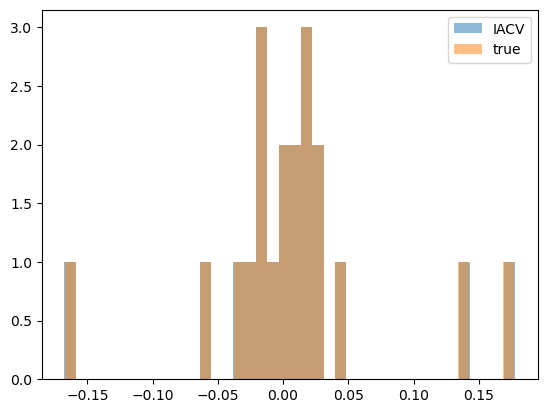

In [12]:
plt.hist(np.mean(clf.approx_cv_obj.iterates, axis=0), alpha=0.5, bins=40, label="IACV")
plt.hist(np.mean(clf.true_cv_obj.iterates, axis=0), alpha=0.5, bins=40, label="true")
plt.legend()

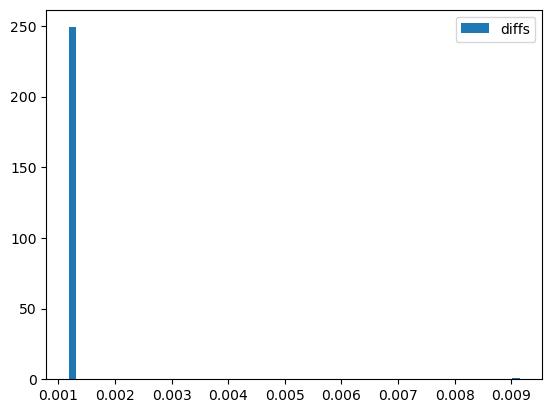

In [13]:
plt.hist(np.linalg.norm(clf.approx_cv_obj.iterates - clf.true_cv_obj.iterates, axis=1), bins=60, label="diffs")
plt.legend()

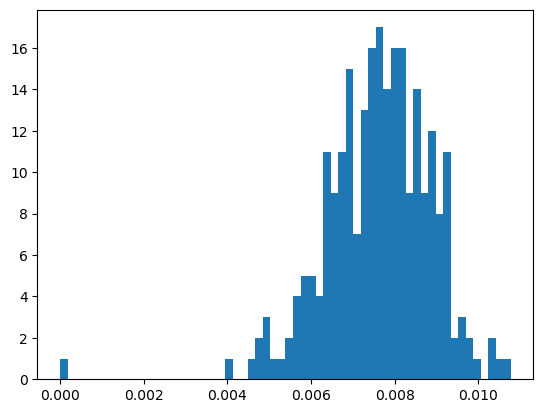

In [14]:
plt.hist(np.linalg.norm(clf.weights_ - clf.true_cv_obj.iterates, axis=1), bins=60, label="diffs")
plt.show()

In [15]:
iacv_mean = np.mean(clf.approx_cv_obj.iterates, axis=0)
coef = iacv_mean/np.linalg.norm(iacv_mean)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

diff 0.04179991036653519 | pct 0.014917301014065742


In [16]:
true_cv_mean = np.mean(clf.true_cv_obj.iterates, axis=0)
coef = true_cv_mean/np.linalg.norm(true_cv_mean)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

diff 0.0418041053897431 | pct 0.014919265395229506


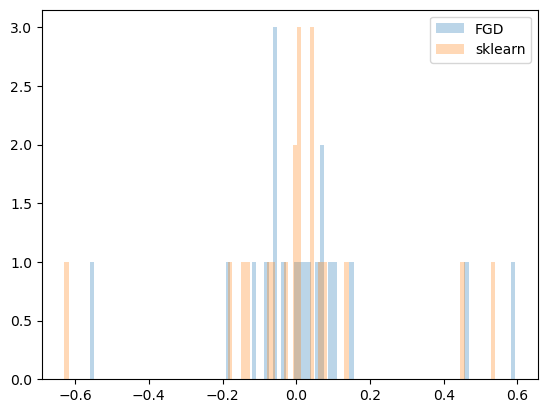

In [17]:
coef = clf.weights_/np.linalg.norm(clf.weights_)
nbin = 100
plt.hist(coef, bins=nbin, label="FGD", alpha=0.3)
plt.hist(sk_coef.flatten(), bins=nbin, label="sklearn", alpha=0.3)
plt.legend()
plt.show()

In [23]:
fig, ax = plt.subplots()
#ax.plot(np.min(clf.approx_cv_obj.cond_nums, axis=1), label="Min Condition Number", c='b')
#ax.plot(np.max(clf.approx_cv_obj.cond_nums, axis=1), label="Max Condition Number", c='r')
ax.plot(np.mean(clf.approx_cv_obj.cond_nums, axis=1), label="Mean Condition Number", c='purple')
#ax.plot(clf.cond_num_bound_, label="Bound", c="black", linestyle="--")

#ax.set_yscale('log')
ax.set_xlabel("Iterations")
ax.set_ylabel("Condition No.")
ws = 1.95 # 1.75
hs = 1.85 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
#plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
plt.show()
plt.savefig('svm_controlled_cond_no.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_7125/1677523172.py:14: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


In [19]:
np.mean(clf.cond_nums_, axis=1)[np.argmax(np.mean(clf.cond_nums_, axis=1))]

AttributeError: 'SVM_smooth' object has no attribute 'cond_nums_'

In [24]:
fig, ax = plt.subplots()
ax.plot(clf.err_approx_["IACV"], label="IACV", c='black')
#ax.plot(clf.err_approx_["NS"], label="NS", c='red', linestyle="--")
ax.plot(clf.err_approx_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iterations (log)")
ax.set_ylabel("Err Approx (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svm_convergence_err_approx_controlled.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_7125/2602303154.py:13: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


In [25]:
fig, ax = plt.subplots()
ax.plot(clf.err_cv_["IACV"], label="IACV", c='black')
ax.plot(clf.err_cv_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iterations (log)")
ax.set_ylabel("Err CV (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svm_convergence_err_cv_controlled.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_7125/3840340694.py:12: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


In [ ]:
last_err_cv = np.asarray(last_err_cv)
last_err_approx = np.asarray(last_err_approx)

last_err_cv = np.nan_to_num(last_err_cv, nan=1e2)
last_err_approx = np.nan_to_num(last_err_approx, nan=1e2)

last_err_cv = np.clip(last_err_cv, 0, 1e2)
last_err_approx = np.clip(last_err_approx, 0, 1e2)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sigmas, last_err_approx[:, 0], label="IACV", c='black')
ax.plot(sigmas, last_err_approx[:, 1], label="Baseline", c='green', linestyle="--")
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("$\log(\sigma)$")
ax.set_ylabel("Err Approx")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svmtest_sigma_err_approx_mod.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sigmas, last_err_cv[:, 0], label="IACV", c='black')
ax.plot(sigmas, last_err_cv[:, 1], label="Baseline", c='green', linestyle="--")
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("$\log(\sigma)$")
ax.set_ylabel("Err CV")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svmtest_sigma_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sigmas, cond_nums)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("$\log(\sigma)$")
ax.set_ylabel("Condition Number")
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('svmtest_sigma_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
# test different lambda values
import time
#lambdas = np.linspace(0, 2.5, 12)
lambdas = np.linspace(0, 2.5, 4)
print(lambdas)
last_err_approx = []
last_err_cv = []
condition_nos = []
iacv_iterates = []
true_iterates = []

start = time.time()
for l in lambdas:
    #clf = SVM_smooth_kernel(sigma=0.25, lbd=l, kernel=RBF(2.5))
    #clf.fit(X_scaled, y, n_iter=1000, eta=0.5/n, approx_cv=True, cv=True,
    #        save_err_approx=True, save_err_cv=True, log_iacv=False, log_iter=False)
    print(f"running experiment for lambda = {l}")
    clf = SVM_smooth(sigma=1e-10, lbd=l)
    clf.fit(X_scaled, y, thresh=1e-7, n_iter=2000, eta=0.5/n, approx_cv=True, cv=True,
            save_err_approx=True, save_err_cv=True, save_cond_nums=True,
            log_iacv=False, log_iter=False, normalise=False, adjust_factor=True)
    y_pred = clf.predict(X_scaled)
    score = accuracy_score(y, y_pred)
    
    condition_nos.append(clf.approx_cv_obj.cond_nums)
    iacv_iterates.append(clf.approx_cv_obj.iterates)
    true_iterates.append(clf.true_cv_obj.iterates)

    #coef = clf.weights_/np.linalg.norm(clf.weights_)

    #print(clf.weights_)
    #print(f"\tlambda {l} | score {score} | grad {np.linalg.norm(clf.nabla_fgd_(clf.weights_, X_scaled, y, clf.sigma_, clf.lbd_))} | sklearn diff {np.mean(np.abs(coef- sk_coef))}")
    print(f"\tlambda {l} | score {score}")
    print(f"\tIACV: {clf.err_approx_['IACV'][-1]} | baseline: {clf.err_approx_['baseline'][-1]}" )
    last_err_approx.append([clf.err_approx_["IACV"][-1], clf.err_approx_["baseline"][-1]])
    last_err_cv.append([clf.err_cv_["IACV"][-1], clf.err_cv_["baseline"][-1]])

end = time.time()
print(end - start)

In [ ]:
last_err_approx = np.asarray(last_err_approx)
last_err_cv = np.asarray(last_err_cv)
condition_nos = np.asarray(condition_nos)
iacv_iterates = np.asarray(iacv_iterates)
true_iterates = np.asarray(true_iterates)

In [ ]:
fig, ax = plt.subplots()
ax.plot(lambdas, last_err_approx[:, 0], label="IACV", c='black')
ax.plot(lambdas, last_err_approx[:, 1], label="Baseline", c='green', linestyle="--")
#ax.set_yscale('log')
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Err Approx")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('kernel_svmtest_lambda_err_approx_mod.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = plt.subplots()
ax.plot(lambdas, last_err_cv[:, 0], label="IACV", c='black')
ax.plot(lambdas, last_err_cv[:, 1], label="Baseline", c='green', linestyle="--")
#ax.set_yscale('log')
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Err CV")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('kernel_svmtest_lambda_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
mean_cond = np.mean(np.mean(condition_nos, axis=1), axis=1)
mean_cond.shape

In [ ]:
fig, ax = plt.subplots()
ax.plot(lambdas, mean_cond)
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Mean Condition Number")
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svmtest_lambda_cond_no_mod.pgf', bbox_inches='tight', pad_inches=0)

## fig, ax = plt.subplots()
start = 0
ax.plot(lambdas[start:], iacv_means[start:], label="IACV")
ax.plot(lambdas[start:], true_means[start:], label="true", linestyle="--")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Mean of CV Iterates")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('svmtest_lambda_coef_mod.pgf', bbox_inches='tight', pad_inches=0)